In [2]:
# Import necessary libraries
import pandas as pd

# Load the data
data=pd.read_csv("intraday_5min_IBM.csv")
print(data.head())
print(data.info())

             timestamp      open     high     low    close  volume
0  2024-10-28 19:55:00  212.6200  212.700  212.40  212.700      52
1  2024-10-28 19:50:00  212.7500  212.760  212.69  212.690    1207
2  2024-10-28 19:45:00  212.7600  212.822  212.76  212.822      41
3  2024-10-28 19:40:00  212.8100  212.810  212.81  212.810       2
4  2024-10-28 19:35:00  212.7545  212.840  212.75  212.822      63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  100 non-null    object 
 1   open       100 non-null    float64
 2   high       100 non-null    float64
 3   low        100 non-null    float64
 4   close      100 non-null    float64
 5   volume     100 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB
None


In [3]:
# Step 1: Handling Missing Values
# Check for missing values
missing_values= data.isnull().sum()
print("missing values: ",missing_values)

missing values:  timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64


In [4]:
# Drop or fill missing values (Here, we'll drop rows with NaN values for simplicity)

data=data.dropna()

In [5]:
# Step 2: Date Parsing and Setting Index
# Assuming there is a column named 'timestamp' that has the date information

data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')
data = data.set_index('timestamp')

In [6]:
# Step 3: Feature Engineering
# Calculating daily returns - assuming a 'close' column for the closing prices
data['daily_return'] = data['close'].pct_change()

# Calculating moving averages
data['MA_10'] = data['close'].rolling(window=10).mean()  # 10-period moving average
data['MA_50'] = data['close'].rolling(window=50).mean()  # 50-period moving average

# Calculating volatility (standard deviation of returns over a 10-period window)
data['volatility'] = data['daily_return'].rolling(window=10).std()

# Display processed data
print(data.head())

                         open     high     low    close  volume  daily_return  \
timestamp                                                                       
2024-10-28 19:55:00  212.6200  212.700  212.40  212.700      52           NaN   
2024-10-28 19:50:00  212.7500  212.760  212.69  212.690    1207     -0.000047   
2024-10-28 19:45:00  212.7600  212.822  212.76  212.822      41      0.000621   
2024-10-28 19:40:00  212.8100  212.810  212.81  212.810       2     -0.000056   
2024-10-28 19:35:00  212.7545  212.840  212.75  212.822      63      0.000056   

                     MA_10  MA_50  volatility  
timestamp                                      
2024-10-28 19:55:00    NaN    NaN         NaN  
2024-10-28 19:50:00    NaN    NaN         NaN  
2024-10-28 19:45:00    NaN    NaN         NaN  
2024-10-28 19:40:00    NaN    NaN         NaN  
2024-10-28 19:35:00    NaN    NaN         NaN  


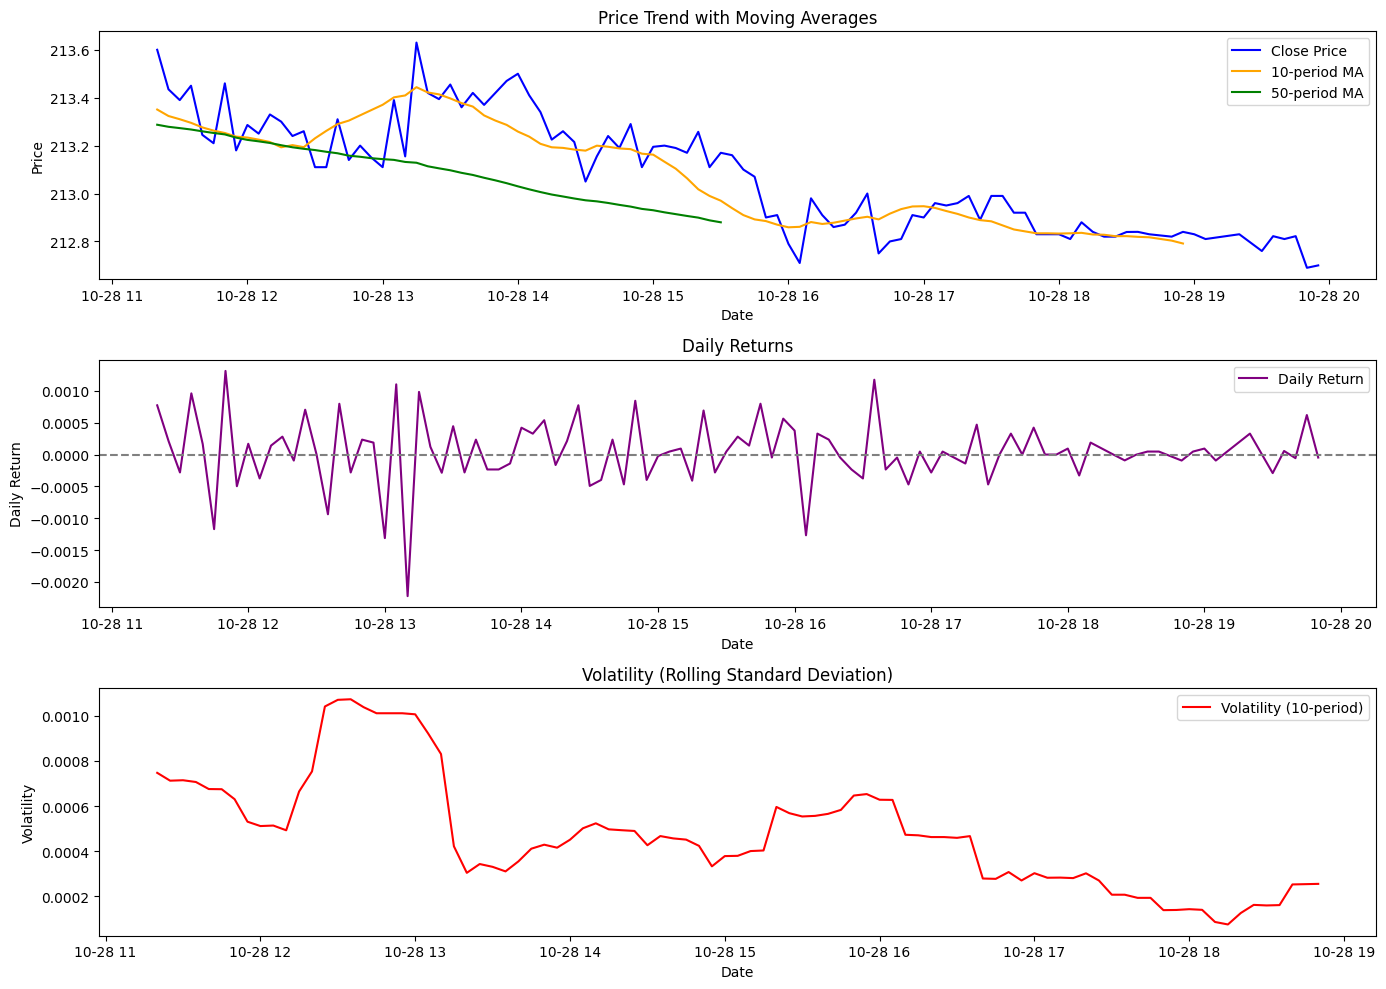

In [9]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 10))

# Subplot 1: Price Trend with Moving Averages
plt.subplot(3, 1, 1)
plt.plot(data.index, data['close'], label='Close Price', color='blue')
plt.plot(data.index, data['MA_10'], label='10-period MA', color='orange')
plt.plot(data.index, data['MA_50'], label='50-period MA', color='green')
plt.title('Price Trend with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Subplot 2: Daily Returns
plt.subplot(3, 1, 2)
plt.plot(data.index, data['daily_return'], label='Daily Return', color='purple')
plt.axhline(0, color='grey', linestyle='--')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()

# Subplot 3: Volatility
plt.subplot(3, 1, 3)
plt.plot(data.index, data['volatility'], label='Volatility (10-period)', color='red')
plt.title('Volatility (Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [11]:
# Assuming you have another DataFrame `data_other` for another stock
data_combined = pd.DataFrame({'IBM': data['close'], 'Other_Stock': data['close']})
correlation = data_combined.corr()
print("Correlation between IBM and Other Stock:\n", correlation)


Correlation between IBM and Other Stock:
              IBM  Other_Stock
IBM          1.0          1.0
Other_Stock  1.0          1.0


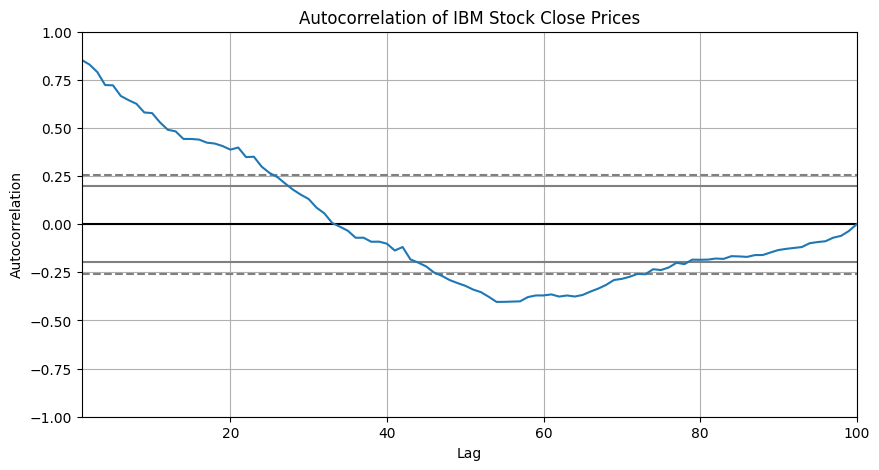

In [12]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Autocorrelation of IBM close prices
plt.figure(figsize=(10, 5))
autocorrelation_plot(data['close'])
plt.title("Autocorrelation of IBM Stock Close Prices")
plt.show()
